## Обнаружение кибератак с помощью машинного обучения

* Для повышения кибербезопасности можно реализовать алгоритмы машинного обучения для обнаружения кибератак.
* Подход включает анализ сетевых данных для выявления потенциальных атак путем выявления корреляций между различными переменными.
* Используя алгоритмы машинного обучения, можно повысить точность и эффективность обнаружения кибератак. Это повысит безопасность цифровых сетей и систем.

## Данные о кибератаках

* Набор данных включает девять типов атак, в том числе:

1.  Фаззеры: атака, которая включает отправку случайных данных в систему для проверки ее устойчивости и выявления любых уязвимостей.

2. Анализ: тип атаки, который включает анализ системы для выявления ее слабых мест и потенциальных целей для эксплуатации.

3. Бэкдоры: атака, которая включает создание скрытой точки входа в систему для последующего использования злоумышленником.

4. DoS (отказ в обслуживании): атака, направленная на нарушение нормального функционирования системы, делая ее недоступной для пользователей.

5. Эксплойты: атака, которая использует уязвимость в системе для получения несанкционированного доступа или контроля.

6. Generic: Универсальная категория, включающая в себя множество различных типов атак, которые не попадают в другие категории.

7. Reconnaissance: Атака, включающая сбор информации о целевой системе, такой как ее уязвимости и потенциальные точки входа, в рамках подготовки к будущей атаке.

8. Shellcode: Атака, включающая выполнение вредоносного кода, как правило, в форме скриптов оболочки, на целевой системе.

9. Черви: Тип вредоносного ПО, которое автоматически распространяется на другие системы, часто нанося вред в процессе.

* Эти девять категорий охватывают широкий спектр типов атак, которые могут использоваться для взлома системы, и важно знать о них, чтобы защититься от потенциальных угроз безопасности.

## Installing Libraries

In [118]:
#!pip install nbformat

In [119]:
#!pip install graphviz

In [120]:
#!pip install dtreeviz

In [121]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('dark')

import dtreeviz

## Подготовка данных

In [160]:
training = pd.read_csv("UNSW_NB15_training-set.csv")
testing = pd.read_csv("UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [161]:
all(training.columns == testing.columns)

True

In [162]:
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [163]:
df.shape

(257673, 44)

In [164]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [165]:
NB15_features = pd.read_csv('NUSW-NB15_features.csv', encoding='cp1252')
NB15_features.head(10)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [166]:
NB15_features.tail(20)

,No.,Name,Type,Description
29,30,Ltime,Timestamp,record last time
30,31,Sintpkt,Float,Source interpacket arrival time (mSec)
31,32,Dintpkt,Float,Destination interpacket arrival time (mSec)
32,33,tcprtt,Float,"TCP connection setup round-trip time, the sum ..."
33,34,synack,Float,"TCP connection setup time, the time between th..."
34,35,ackdat,Float,"TCP connection setup time, the time between th..."
35,36,is_sm_ips_ports,Binary,If source (1) and destination (3)IP addresses ...
36,37,ct_state_ttl,Integer,No. for each state (6) according to specific r...
37,38,ct_flw_http_mthd,Integer,No. of flows that has methods such as Get and ...
38,39,is_ftp_login,Binary,If the ftp session is accessed by user and pas...


In [167]:
# from deep_translator import GoogleTranslator

# def translate_column(dataframe, column_name, target_language='ru'):
#     """
#     Функция для перевода текста в указанной колонке DataFrame.

#     :param dataframe: pandas.DataFrame, входной DataFrame
#     :param column_name: str, название столбца, который нужно перевести
#     :param target_language: str, целевой язык перевода (по умолчанию 'ru')
#     :return: pandas.DataFrame, DataFrame с добавленным переводом
#     """
#     translator = GoogleTranslator(source='en', target=target_language)
    
#     # Создаем новую колонку с переводом
#     dataframe['Описание'] = dataframe[column_name].apply(translator.translate)
    
#     return dataframe

In [168]:
#NB15_features = translate_column(NB15_features, 'Description', target_language='ru')


In [169]:
NB15_features.tail(20)

,No.,Name,Type,Description
29,30,Ltime,Timestamp,record last time
30,31,Sintpkt,Float,Source interpacket arrival time (mSec)
31,32,Dintpkt,Float,Destination interpacket arrival time (mSec)
32,33,tcprtt,Float,"TCP connection setup round-trip time, the sum ..."
33,34,synack,Float,"TCP connection setup time, the time between th..."
34,35,ackdat,Float,"TCP connection setup time, the time between th..."
35,36,is_sm_ips_ports,Binary,If source (1) and destination (3)IP addresses ...
36,37,ct_state_ttl,Integer,No. for each state (6) according to specific r...
37,38,ct_flw_http_mthd,Integer,No. of flows that has methods such as Get and ...
38,39,is_ftp_login,Binary,If the ftp session is accessed by user and pas...


In [170]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [134]:
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

## Категориальные данные

In [172]:
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes
    
df['attack_cat'] = df['attack_cat'].astype('category')

In [173]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


## Визуализация различных категорий атак

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


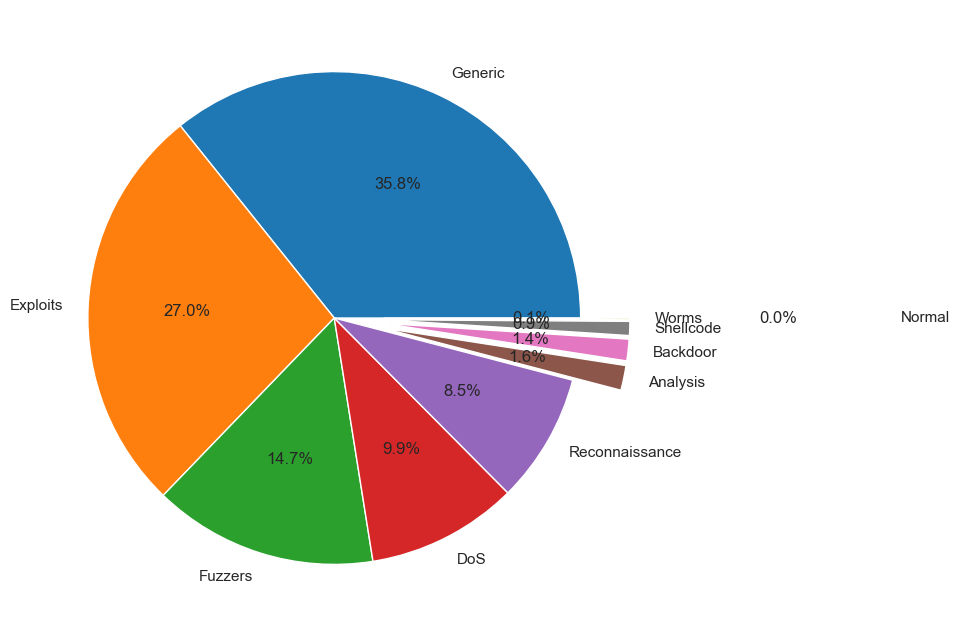

In [174]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

* Чаще всего встречаются атаки типа «Общие» и «Эксплойты».

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                257673 non-null  float64 
 1   proto              257673 non-null  int16   
 2   service            257673 non-null  int8    
 3   state              257673 non-null  int8    
 4   spkts              257673 non-null  int64   
 5   dpkts              257673 non-null  int64   
 6   sbytes             257673 non-null  int64   
 7   dbytes             257673 non-null  int64   
 8   rate               257673 non-null  float64 
 9   sttl               257673 non-null  int64   
 10  dttl               257673 non-null  int64   
 11  sload              257673 non-null  float64 
 12  dload              257673 non-null  float64 
 13  sloss              257673 non-null  int64   
 14  dloss              257673 non-null  int64   
 15  sinpkt             257673 non-null

## Разделение данных

In [175]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


## Модель дерева решений:
* Использование модели дерева решений для создания набора критериев для обнаружения кибератак.
* Проведение поиска по сетке для оптимизации модели в сторону максимизации отзыва.
* Уровень Recall должен быть высоким для создания первого уровня защиты.

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


In [177]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


## Визуализация правил

:::::::> ПРАВИЛА ДЛЯ ВЫСОКОГО УРОВНЯ RECALL RATE <::::::: 
 |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


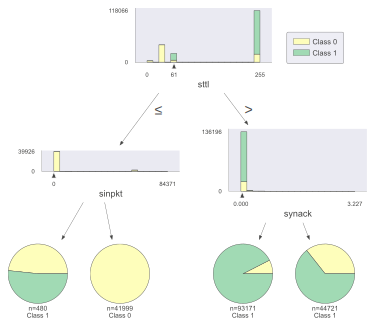

In [142]:
from sklearn.tree import export_text
import dtreeviz

print(":::::::> ПРАВИЛА ДЛЯ ВЫСОКОГО УРОВНЯ RECALL RATE <::::::: \n" ,export_text(clf,feature_names=feature_names))

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)  
viz_model.view()

In [143]:
#!brew install graphviz

In [144]:
#!arch -arm64 brew install graphviz

In [145]:
#!arch -arm64 brew update

In [146]:
#!dot -version

In [178]:
import pandas as pd

rules = export_text(clf, feature_names=feature_names)
rules_table = pd.DataFrame([{"rule": rule} for rule in rules.split("\n") if rule])
print(rules_table)

                      rule
0       |--- sttl <= 61.00
1  |   |--- sinpkt <= 0.00
2    |   |   |--- class: 1
3  |   |--- sinpkt >  0.00
4    |   |   |--- class: 0
5       |--- sttl >  61.00
6  |   |--- synack <= 0.04
7    |   |   |--- class: 1
8  |   |--- synack >  0.04
9    |   |   |--- class: 1


* Из дерева решений мы визуализировали правило дерева как sttl<=61 и sttl>61

## Фильтрация данных для потенциальных атак

In [179]:
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


* Система на основе правил отфильтровала 23% сетевого трафика для дальнейшего анализа, продемонстрировав свою эффективность в обнаружении не представляющей угрозы сетевой активности. Теперь мы будем обнаруживать кибератаки, применяя обученную модель к отфильтрованным тестовым данным.

In [180]:
from sklearn.metrics import accuracy_score, precision_score

In [181]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test_2)
    
    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)
    
    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()
    
    return {'Recall' : recall}

In [182]:
results = {}

## Random Forest Model

Recall:  0.9571815389589395
Precision:  0.9647257693326001
Accuracy:  0.9351956247370635


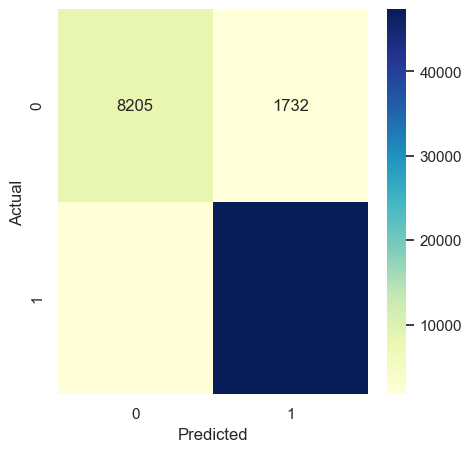

In [183]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

results['Random Forest Model'] = model_evaluation(rf)

## Visualizing the rules present in the tree

In [153]:
from sklearn.tree import export_text
feature_names = list(X.columns)

print(export_text(rf.estimators_[99],feature_names=feature_names))

|--- dpkts <= 0.50
|   |--- ct_srv_src <= 2.50
|   |   |--- sbytes <= 53.00
|   |   |   |--- sinpkt <= 30000.02
|   |   |   |   |--- sbytes <= 26.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  26.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- sinpkt >  30000.02
|   |   |   |   |--- class: 0.0
|   |   |--- sbytes >  53.00
|   |   |   |--- rate <= 0.11
|   |   |   |   |--- sbytes <= 62.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  62.50
|   |   |   |   |   |--- sttl <= 143.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- sttl >  143.00
|   |   |   |   |   |   |--- ct_src_dport_ltm <= 1.50
|   |   |   |   |   |   |   |--- sinpkt <= 5037.05
|   |   |   |   |   |   |   |   |--- ct_srv_dst <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- ct_srv_dst >  1.50
|   |   |   |   |   |   |   |   |   |--- sbytes <= 803.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
| 

Recall:  0.9517458777885548
Precision:  0.9657774405872583
Accuracy:  0.931729070256626


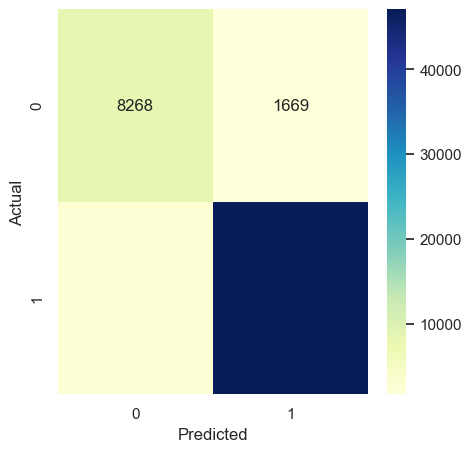

In [184]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

results['XGBoost Classifier'] = model_evaluation(xgbc)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

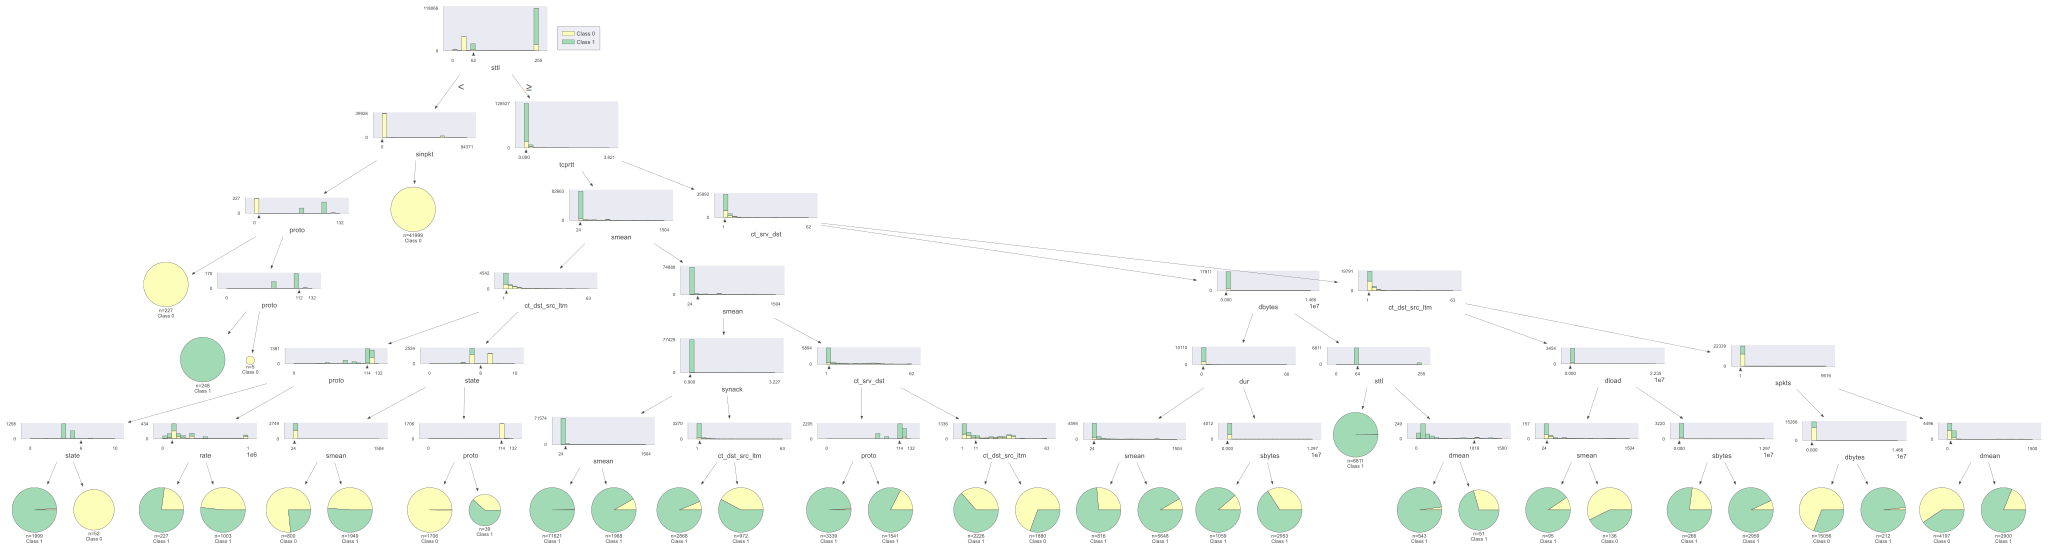

In [155]:
viz_model = dtreeviz.model(xgbc,tree_index=1,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)  
viz_model.view()

In [157]:
# import lightgbm
# from lightgbm import LGBMClassifier

# lgbc = LGBMClassifier()

# results['Light GBM Classifier'] = model_evaluation(lgbc)

In [185]:
import lightgbm

lightgbm.plot_tree(lgbc,figsize = (20,12))
plt.show()

AttributeError: module 'pandas.core.strings' has no attribute 'StringMethods'

In [ ]:
comparision = pd.DataFrame(results)
comparision

## Проверка гипотез:  
#### Тест суммы рангов Уилкоксона:  
* Тест суммы рангов Уилкоксона является непараметрическим тестом, что означает, что он не предполагает, что данные распределены нормально.
* Тест суммы рангов Уилкоксона вычисляет Z-статистику и p-значение.
* Z-статистика является мерой того, насколько велика вариация между тремя оценками полноты.
* P-значение является мерой вероятности получения результата, столь же экстремального, как наблюдаемый, если нулевая гипотеза верна.
* Нулевая гипотеза является гипотезой о том, что нет никакой разницы в полноте трех моделей.
* Если p-значение меньше 0,05, то мы можем отвергнуть нулевую гипотезу и сделать вывод о том, что существует статистически значимая разница в полноте трех моделей.

In [186]:
from scipy.stats import wilcoxon
#, comparision.iloc[0][2]
z_statistic, p_value = wilcoxon([comparision.iloc[0][0], comparision.iloc[0][1]])

# Print the results
print('Z-statistic:', z_statistic)
print('p-value:', p_value)

# Interpret the results
if p_value < 0.05:
    print('The difference in the recall of the three models is statistically significant.')
else:
    print('The difference in the recall of the three models is not statistically significant.')


Z-statistic: 0.0
p-value: 0.5
The difference in the recall of the three models is not statistically significant.


* Любая из трех моделей может быть применена для выявления важных характеристик с целью прогнозирования кибератак.

## Корреляции

* Чтобы улучшить наше понимание переменных, участвующих в обнаружении кибератак, нам необходимо проанализировать сетевые данные.
* Диаграммы корреляции могут быть полезны для визуализации того, как различные переменные связаны друг с другом и с кибератаками.
* Кроме того, модели случайного леса могут помочь определить важность различных признаков при прогнозировании целевой переменной (кибератак).
* Мы можем сравнить рейтинги признаков из случайного леса с результатами корреляционного анализа, чтобы лучше понять ключевые признаки, на которых следует сосредоточиться для эффективного обнаружения кибератак.

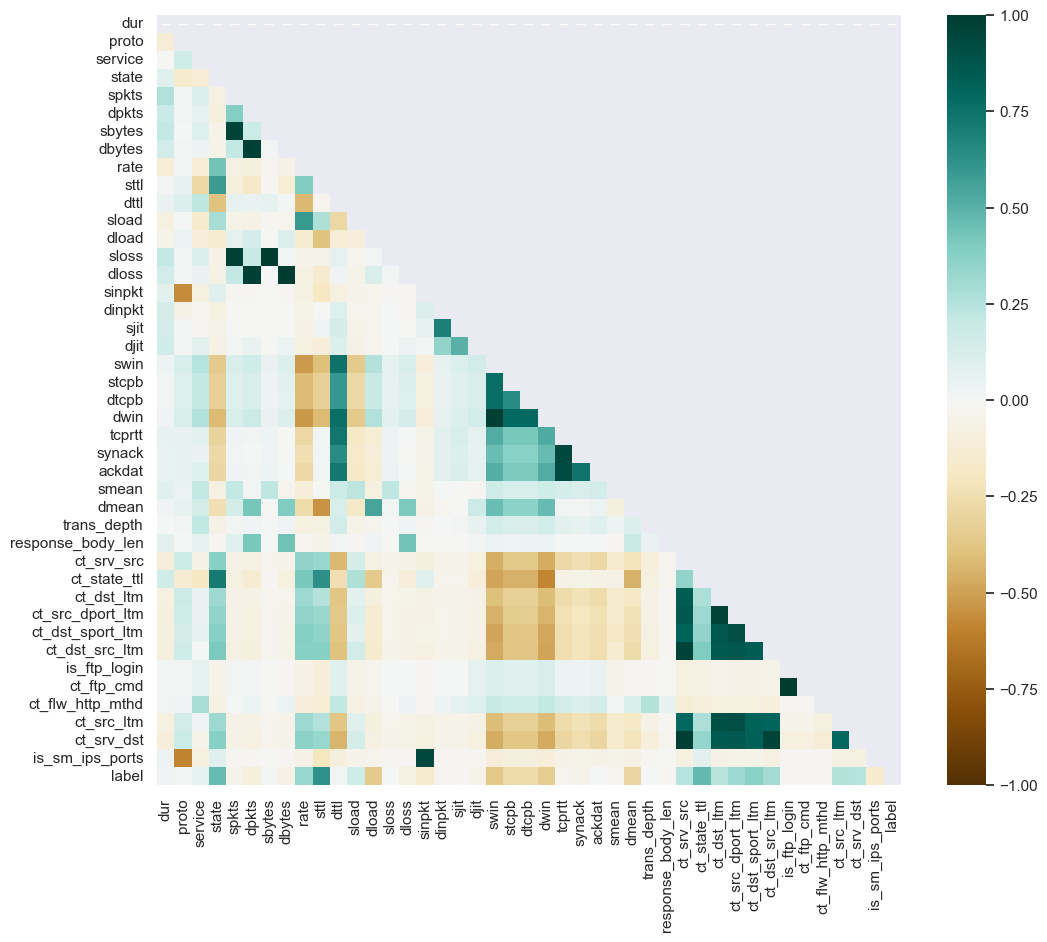

In [187]:
# plt.figure(figsize=(12, 10))
# mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
# sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)
# plt.show()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Оставляем только числовые столбцы
numeric_df = df.select_dtypes(include=['number'])

# Вычисляем корреляцию
correlation_matrix = numeric_df.corr()

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Визуализация heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap='BrBG', mask=mask, annot=True)
plt.show()

### Корреляция переменных с кибератакой (метка)

In [191]:
# plt.figure(figsize=(10, 10))
# heatmap = sns.heatmap(df.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16)
# plt.show()

### Следующие переменные положительно коррелируют с кибератаками:

* sttl: значение времени жизни от источника до назначения.
* ct_state_ttl и state: эти функции отражают различные этапы TCP-подключений и могут быть связаны со сканированием портов, SYN-флудом или DDoS-атаками.
* ct_dst_sport_ltm: эта функция измеряет количество подключений с одного и того же исходного IP-адреса к одному и тому же порту назначения за короткий промежуток времени.
* rate: эта функция может представлять различные типы скоростей или частот трафика.

### Следующие переменные отрицательно коррелируют с кибератаками:

* swin
* dload

## Рейтинг функций от Random Forest

In [192]:
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

feature_imp[:10].style.background_gradient()

,Name,Importance
0,sbytes,0.233943
1,sttl,0.141396
2,smean,0.123293
3,ct_srv_dst,0.116477
4,ct_dst_src_ltm,0.081774
5,ct_state_ttl,0.074932
6,dload,0.065896
7,sload,0.064070
8,rate,0.058301
9,tcprtt,0.039918


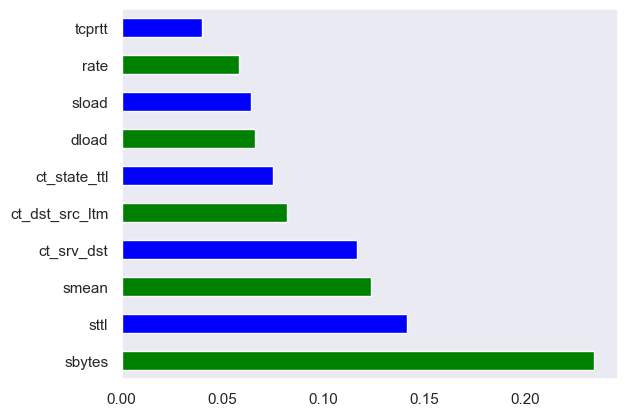

In [193]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)
plt.show()

### Давайте выберем только 10 основных функций и найдем их связь с типом кибератаки.


In [194]:
top10= feature_imp.Name[:10].tolist()
top10

['sbytes',
 'sttl',
 'smean',
 'ct_srv_dst',
 'ct_dst_src_ltm',
 'ct_state_ttl',
 'dload',
 'sload',
 'rate',
 'tcprtt']

In [195]:
X = df[top10]
y = df['label'].values

rf_top10 = RandomForestClassifier(random_state=11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf_top10.fit(X_train, y_train)

y_pred = rf_top10.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
 

Accuracy:  0.9449044009210629


In [ ]:

top10= feature_imp.Name[:10].tolist()

attack_names = np.array(df['attack_cat'].unique())

X_top = df.loc[:, df.columns.isin(top10)]
y_top = pd.factorize(df['attack_cat'])[0]


clf_top10 = DecisionTreeClassifier(max_depth=6)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=11)

clf_top10.fit(X_train_top, y_train_top)

viz_model = dtreeviz.model(clf_top10,
                           X_train=X_train_top, y_train=y_train_top, 
                           class_names=attack_names,
                           feature_names=top10)

viz_model.view(fancy=False,scale=1) 

## Случайный лес с категорией атаки в качестве меток прогноза


Accuracy:  0.8243253732115599


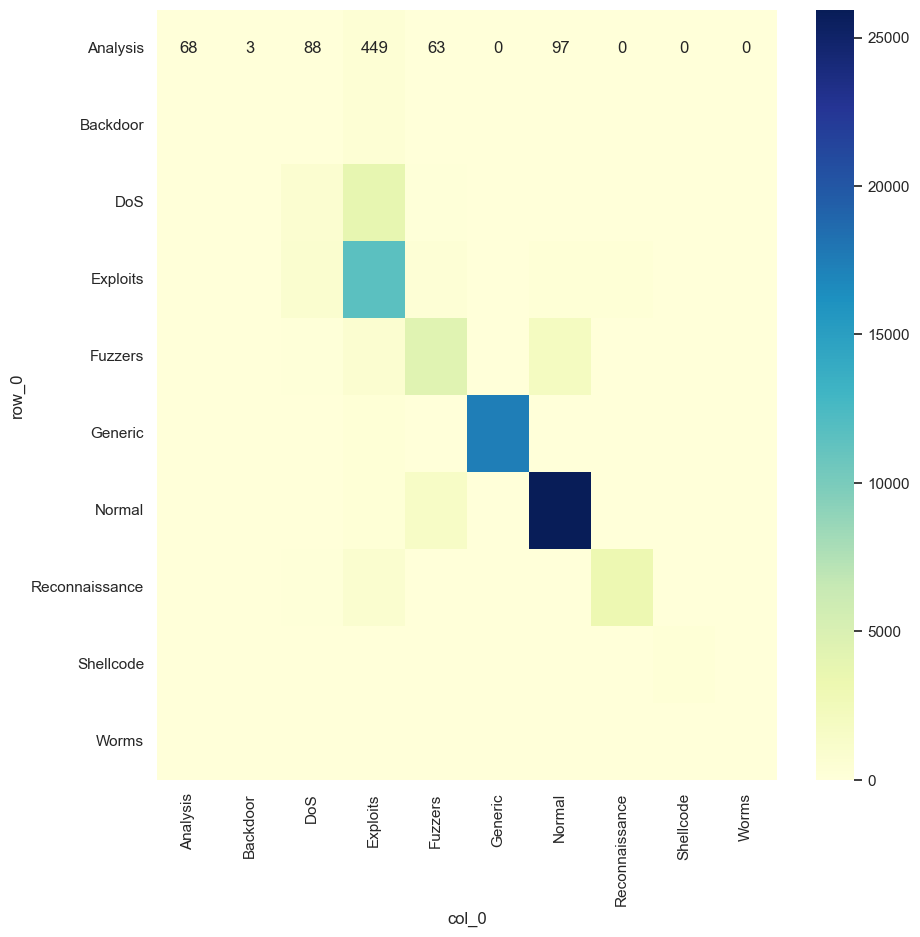

In [189]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = RandomForestClassifier(random_state=11,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()


In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

      Analysis       0.76      0.09      0.16       768
      Backdoor       0.52      0.07      0.12       658
           DoS       0.38      0.16      0.23      4909
      Exploits       0.63      0.87      0.73     13403
       Fuzzers       0.66      0.60      0.63      7283
       Generic       1.00      0.98      0.99     17790
        Normal       0.91      0.93      0.92     27814
Reconnaissance       0.91      0.75      0.82      4198
     Shellcode       0.63      0.59      0.61       418
         Worms       0.69      0.39      0.50        61

      accuracy                           0.82     77302
     macro avg       0.71      0.54      0.57     77302
  weighted avg       0.82      0.82      0.81     77302



* **Атаки Generic, Normal и Exploits имеют высокую отзывность.**

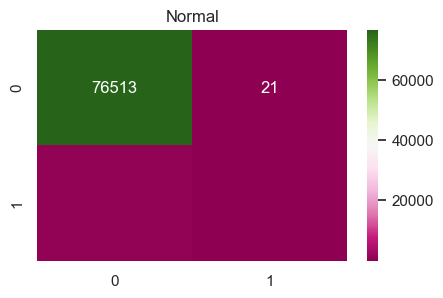

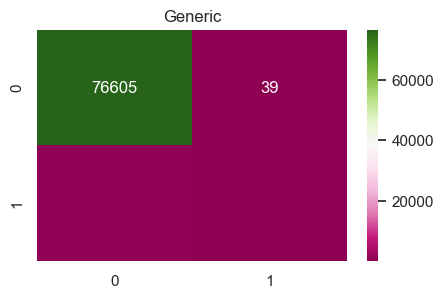

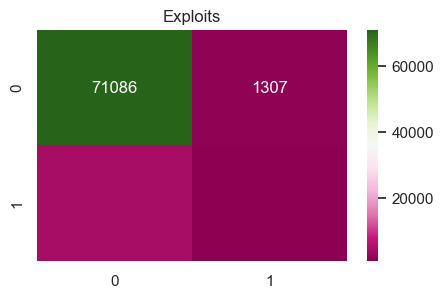

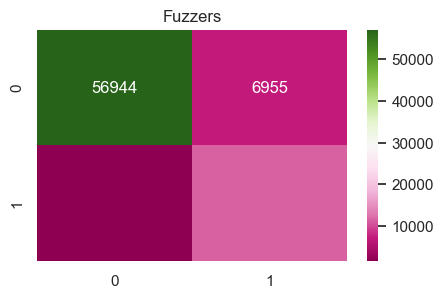

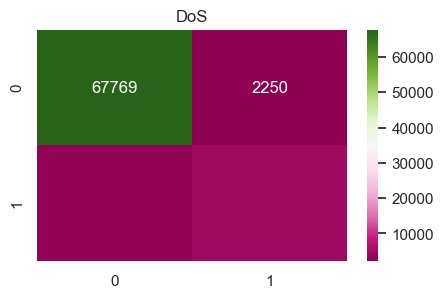

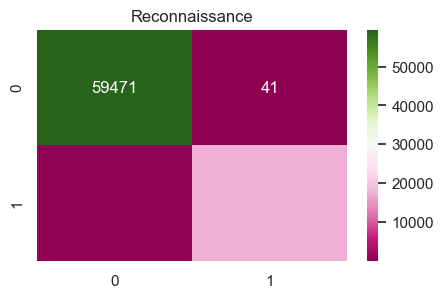

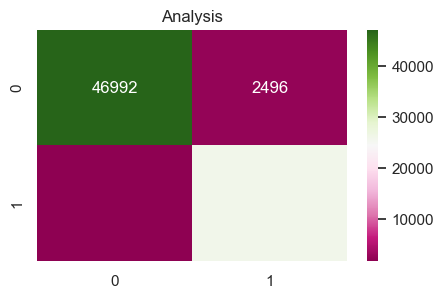

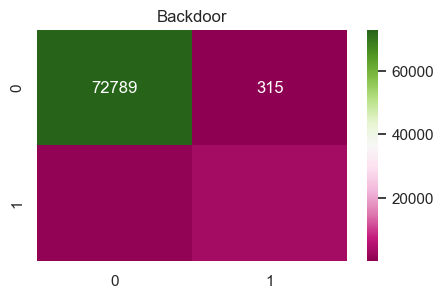

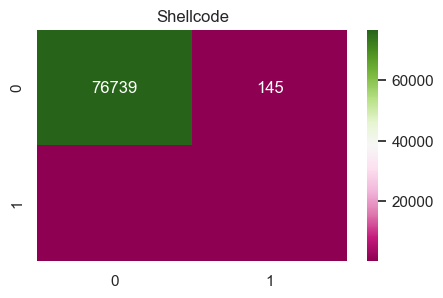

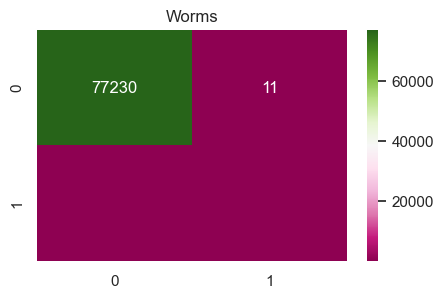

In [79]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test,y_pred)
for i,j in zip(mcm,df['attack_cat'].value_counts().index):
    plt.subplots(figsize = (5,3))
    sns.heatmap(i,annot=True,fmt = 'd',cmap = "PiYG")
    plt.title(j)

* **Fuzzers, Reconaissance, and Analysis has true negatives and false negatives.**

## Заключение

* **Модель случайного леса лучше всего подходит для обнаружения кибератак.**
* **Модель дерева решений использовалась для определения правил обнаружения кибератак.**
* **В результате этого анализа были выявлены наиболее важные признаки, которые играют важную роль в обнаружении кибератак.**
* **Модель случайного леса хорошо справляется с точностью как с зависимыми признаками, так и с метками и категориями атак.**